<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II

---

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Vamos trabalhar com os dados disponibilizados pela Loggi para realizarmos uma análise exploratória com o objetivo de trazer insights para a empresa. 

A Loggi é uma startup unicórnio brasileira de tecnologia focada em logística, avaliada em US$ 1 bilhão, com investimentos de grandes empresas como SoftBank, Microsoft, GGV Capital, Monashees e Kaszek (fonte). Inicialmente, a empresa começou suas operações entregando documentos entre 2013 e 2014. Posteriormente, expandiu seu escopo para o segmento de e-commerce e, desde 2017, tem atuado também nas entregas de alimentos.

## 2\. Pacotes e bibliotecas

Neste projeto, utilizaremos o pacote GeoPandas.

O GeoPandas é uma ferramenta poderosa para manipulação de dados geográficos. Com o GeoPandas, será possível visualizar as coordenadas dos hubs e das entregas no mapa do Distrito Federal, segmentado pelas regiões dos hubs.

Segue o link da documentação oficial do [GeoPandas](https://geopandas.org/en/stable/docs.html).

In [1]:
# Instalando o GeoPandas e fazendo a importação

!pip install geopandas
import geopandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Instalando os pacotes tabula e PyPDF2
!pip install tabula-py
!pip install PyPDF2


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Importando todos os pacotes e bibliotecas necessárias

import json

import tabula
import PyPDF2
from PyPDF2 import PdfReader
import pandas as pd
import geopy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


## 3\. Exploração de dados

O dado bruto está disponível para download neste [link](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/deliveries.json). Vamos realizar o seu download num arquivo `JSON` com o nome `deliveries.json`.

In [4]:
# Fazendo o download com a função !wget
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [5]:
# Abrindo e carregando o arquivo deliveries.json

with open("deliveries.json", mode="r", encoding="utf8") as file:
    data = json.load(file)

# Transformando o Dict Python em um DataFrame Pandas

deliveries_df = pd.DataFrame(data)

# Visualizando o DataFrame deliveries_df

deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [6]:
# Utilizando a função len para verificar o número de caracteres

len(data)

199

**Exploração inicial dos dados:**

In [7]:
dado_inicial = data[0]

In [8]:
# Verificando as nomenclaturas de cada coluna
dado_inicial.keys()

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])

In [9]:
dado_inicial["name"]

'cvrp-2-df-33'

In [10]:
dado_inicial["region"]

'df-2'

In [11]:
dado_inicial["origin"]["lat"]

-15.83814451122274

In [12]:
dado_inicial["origin"]["lng"]

-48.05498915846707

In [13]:
dado_inicial["vehicle_capacity"]

180

In [14]:
dado_inicial["deliveries"][0]["point"]["lat"]

-15.848929154862294

## 4\. Manipulação

**Data Wrangling - Transformação e limpeza.**

Após fazer a leitura dos dados, podemos observar que existem dados aninhados na coluna "origin". Então, precisamos utilizar o método "json_normalize" do Pandas com o objetivo de separar essas informações em colunas de um novo DataFrame.

Processo de Data Wrangling: Transformação e limpeza dos dados brutos num formato adequado para fazer a análise dos dados.

In [15]:
deliveries_df = pd.DataFrame(data)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


Normalização dos dados aninhados no DataFrame com a operação flatten, transformando as estruturas de 'chave: valor' em colunas separadas:

In [16]:
hub_origin_df = pd.json_normalize(deliveries_df["origin"])
hub_origin_df

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145
...,...,...
194,-47.893662,-15.805118
195,-47.802665,-15.657014
196,-47.893662,-15.805118
197,-48.054989,-15.838145


In [17]:
# Após a modificação utilizando o json_normalize, vamos utilizar a função "merge" para combinar os DataFrames:

deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how="inner", left_index=True, right_index=True)

# Removendo a coluna "origin" no DF original:

deliveries_df = deliveries_df.drop("origin", axis=1)

# Selecionando e renomeando as novas colunas do DataFrame:

deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_df

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."
...,...,...,...,...,...,...
194,cvrp-1-df-59,df-1,-47.893662,-15.805118,180,"[{'id': 'fc800db1942651f8195f870c5930ca26', 'p..."
195,cvrp-0-df-87,df-0,-47.802665,-15.657014,180,"[{'id': '3d50e820e1c16621e1fa19f1a7df0c56', 'p..."
196,cvrp-1-df-83,df-1,-47.893662,-15.805118,180,"[{'id': 'e6cffd090ce2a7bd0e0292f1ed9acd3', 'po..."
197,cvrp-2-df-7,df-2,-48.054989,-15.838145,180,"[{'id': '51b1354b02a20d919b83bb664ea4d845', 'p..."


Normalizando os dados da coluna 'deliveries' através do método "explode", e depois separando os dados das linhas, e ordenando as colunas através do método "concat":

In [18]:
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [19]:
# Agora precisamos concatenar a variável "deliveries_exploded_df" e transformar em um único DF, preservando os índices:

deliveries_normalized_df = pd.concat([pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda coluna: coluna["size"])).rename(columns={"deliveries": "delivery_size"}),
                                      pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda coluna: coluna["id"])).rename(columns={"deliveries": "delivery_id"}),
                                      pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda coluna: coluna["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
                                      pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda coluna: coluna["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
                                      ], axis=1)
deliveries_normalized_df

,delivery_size,delivery_id,delivery_lat,delivery_lng
0,9,313483a19d2f8d65cd5024c8d215cfbd,-15.848929,-48.116189
0,2,320c94b17aa685c939b3f3244c3099de,-15.850772,-48.118195
0,1,3663b42f4b8decb33059febaba46d5c8,-15.847871,-48.112483
0,2,e11ab58363c38d6abc90d5fba87b7d7,-15.846471,-48.118023
0,7,54cb45b7bbbd4e34e7150900f92d7f4b,-15.858055,-48.114898
...,...,...,...,...
198,8,21693bf442ac5890adbdf2648c12881a,-15.997694,-48.064269
198,4,7aaa35088b37b6e542c4cd69663a7ebf,-16.003597,-48.065176
198,9,60c00d5390da4f28167439cd9c566703,-16.003808,-48.065841
198,1,51f456963785e7381243ff7baf7efd06,-16.001568,-48.062327


In [20]:
# Excluindo a coluna "deliveries" original:
deliveries_df = deliveries_df.drop("deliveries", axis=1)

Combinando os dados com o conjunto de dados principal.

In [21]:
# Combinando o novo DF deliveries_normalized_df com o DF original deliveries_df com a função "merge":
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how="right", left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)

deliveries_df

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_id,delivery_lat,delivery_lng
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,313483a19d2f8d65cd5024c8d215cfbd,-15.848929,-48.116189
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,320c94b17aa685c939b3f3244c3099de,-15.850772,-48.118195
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,3663b42f4b8decb33059febaba46d5c8,-15.847871,-48.112483
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,e11ab58363c38d6abc90d5fba87b7d7,-15.846471,-48.118023
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,54cb45b7bbbd4e34e7150900f92d7f4b,-15.858055,-48.114898
...,...,...,...,...,...,...,...,...,...
636144,cvrp-2-df-62,df-2,-48.054989,-15.838145,180,8,21693bf442ac5890adbdf2648c12881a,-15.997694,-48.064269
636145,cvrp-2-df-62,df-2,-48.054989,-15.838145,180,4,7aaa35088b37b6e542c4cd69663a7ebf,-16.003597,-48.065176
636146,cvrp-2-df-62,df-2,-48.054989,-15.838145,180,9,60c00d5390da4f28167439cd9c566703,-16.003808,-48.065841
636147,cvrp-2-df-62,df-2,-48.054989,-15.838145,180,1,51f456963785e7381243ff7baf7efd06,-16.001568,-48.062327


Analisando a estrutura do conjunto de dados com os dados estruturados no DataFrame. Agora, partiremos para análise exploratória e limpeza dos dados.

In [22]:
# Verificando a quantidade de linhas e colunas do DF:

deliveries_df.shape

(636149, 9)

In [23]:
# Conhecendo os tipos de dados e as colunas:

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_id       636149 non-null  object 
 7   delivery_lat      636149 non-null  float64
 8   delivery_lng      636149 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 43.7+ MB


In [24]:
# Verificando se existem dados faltantes nas colunas do DataFrame:

deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
delivery_size       False
delivery_id         False
delivery_lat        False
delivery_lng        False
dtype: bool

In [25]:
# Identificando valores nulos:

deliveries_df.isna().sum()

name                0
region              0
hub_lng             0
hub_lat             0
vehicle_capacity    0
delivery_size       0
delivery_id         0
delivery_lat        0
delivery_lng        0
dtype: int64

In [26]:
# Verificando valores distintos nas colunas:

deliveries_df.nunique()

name                   199
region                   3
hub_lng                  3
hub_lat                  3
vehicle_capacity         1
delivery_size           10
delivery_id         291566
delivery_lat        291566
delivery_lng        291566
dtype: int64

## 5. Enriquecimento dos Dados
Enriquecendo os dados através da geocodificação reversa do hub:

A **geocodificação** é o processo que transforma uma localização descrita por um texto (endereço, nome do local, etc.) em sua respectiva coodernada geográfica (latitude e longitude). A **geocodificação reversa** faz o oposto, transforma uma coordenada geográfica de um local em suas respectivas descrições textuais.

In [27]:
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]]
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


Empresas como Google, Bing e Yahoo! fornecem **geocodificação** como serviço (e cobram por isso). Existe uma projeto *open source* chamado de [OpenStreetMap](https://www.openstreetmap.org/) que mantem um serviço gratuito de geocodificação chamado [Nominatim](https://nominatim.org/), serviço este que apresenta como limitação a quantia de [uma única consuta por segundo](https://operations.osmfoundation.org/policies/nominatim/). Vamos utilizá-lo através do pacote Python `geopy` para fazer a operação reversa e enriquecer o nosso DataFrame principal.

In [28]:
geolocator = Nominatim(user_agent="ebac_geocoder")
location = geolocator.reverse("-15.657013854445248, -47.802664728268745")

print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 13551965,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656916027876347",
  "lon": "-47.80264463632131",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.10000999999999993,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-202, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "stat

Vamos então aplicar a geocodificação nas coordenadas das três regiões e extrair informações de **cidade** e **bairro**.

In [29]:
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [30]:
hub_df["coordinates"] = hub_df["hub_lat"].astype(str) + ", " + hub_df["hub_lng"].astype(str)
hub_df["geodata"] = hub_df["coordinates"].apply(geocoder)
hub_df

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [31]:
hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))
hub_geodata_df

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,13551965,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,13548034,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,10766946,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [32]:
# Verificando a quantidade de colunas:

hub_geodata_df.columns

Index(['place_id', 'licence', 'osm_type', 'osm_id', 'lat', 'lon', 'class',
       'type', 'place_rank', 'importance', 'addresstype', 'name',
       'display_name', 'boundingbox', 'address.road', 'address.residential',
       'address.suburb', 'address.town', 'address.municipality',
       'address.county', 'address.state_district', 'address.state',
       'address.ISO3166-2-lvl4', 'address.region', 'address.postcode',
       'address.country', 'address.country_code', 'address.neighbourhood',
       'address.city', 'address.shop', 'address.house_number'],
      dtype='object')

In [33]:
# Fazendo os tratamentos das 2 colunas que nos interessa: City (Cidade) e Suburb (Bairro)

hub_geodata_df = hub_geodata_df[['address.town', 'address.suburb', 'address.city']]
hub_geodata_df.rename(columns={'address.town':'hub_town', 'address.suburb':'hub_suburb', 'address.city':'hub_city'}, inplace=True)
hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
hub_geodata_df['hub_suburb'] = np.where(hub_geodata_df['hub_suburb'].notna(), hub_geodata_df['hub_suburb'], hub_geodata_df['hub_city'])
hub_geodata_df = hub_geodata_df.drop('hub_town', axis=1)
hub_geodata_df.head()

/var/folders/5j/1xl9_4g17_s_rk9dswvp3d7m0000gn/T/ipykernel_27468/1930014408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={'address.town':'hub_town', 'address.suburb':'hub_suburb', 'address.city':'hub_city'}, inplace=True)
/var/folders/5j/1xl9_4g17_s_rk9dswvp3d7m0000gn/T/ipykernel_27468/1930014408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
/var/folders/5j/1xl9_4g17_s_rk9dswvp3d7m0000gn/T/ipy

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


Combinando o DataFrame 'hub_geodata_df' com as informações de cidade e bairro, com o dataFrame principal 'deliveries_df':

In [34]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [35]:
# Combinando o DF hub_df junto com o DF original: deliveries_df

deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how='inner', on='region')
deliveries_df = deliveries_df[['name', 'region', 'hub_lng', 'hub_lat', 'hub_city', 'hub_suburb', 'vehicle_capacity', 'delivery_size', 'delivery_lng', 'delivery_lat']]
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


**Aplicando a geolocalização reversa nas coordenadas de entrega.**

Enquanto o **hub** contém apenas **3** geolocalizações distintas, as **entregas** somam o total de **636.149**, o que levaria em torno de 7 dias para serem consultadas no servidor do Nominatim, dada a restrição de uma consulta por segundo. Contudo, para cargas pesadas como esta, o software oferece uma instalação [local](https://nominatim.org/release-docs/latest/admin/Installation/) (na sua própria máquina) que pode ser utilizada sem restrição.

In [36]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

In [37]:
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")
deliveries_geodata_df

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol
...,...,...,...,...
636144,-48.064269,-15.997694,Gama,Setor Oeste
636145,-48.065176,-16.003597,Gama,Setor Oeste
636146,-48.065841,-16.003808,Gama,Setor Oeste
636147,-48.062327,-16.001568,Gama,Setor de Indústrias - Industrial


In [38]:
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how="inner", left_index=True, right_index=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


Verificando se os dados adicionados ao DataFrame são relevantes para a exploração dos dados:

In [39]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 58.2+ MB


In [40]:
deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

## 6\. Visualização

Visualizando as coordenadas dos hubs e das entregas no mapa do Distrito Federal, segmentados pela região dos hubs, através do pacote Python Geopandas.
Vamos utilizar o geopandas para criar 3 mapas e colocar um mapa acima do outro.
1. Mapa do Distrito Federal (DF)
2. Mapa dos Hubs
3. Mapa das Entregas

In [41]:
# Fazendo o download do dado cru pelo próprio IBGE
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip


In [43]:
# Descompactando esse dado dentro de uma pasta chamada Maps
!unzip -v -q distrito-federal.zip -d ./maps

# Coletando dois mapas de interesse de Brasília, o formato shp e o shx que é um complemento para o shp
# Nome: Limite da Unidade da Federação
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

caution:  not extracting; -d ignored
[distrito-federal.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of distrito-federal.zip or
        distrito-federal.zip.zip, and cannot find distrito-federal.zip.ZIP, period.


In [44]:
# Lendo o arquivo de interesse
mapa = geopandas.read_file('distrito-federal.shp')
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


# Mapa dos Hubs

Criando um novo DataFrame através do 'deliveries_df', adicionando uma coluna com os pontos dos hubs:

In [45]:
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df["hub_lng"], hub_df["hub_lat"]))
geo_hub_df.head()

,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


# Mapa das Entregas
Criando um novo DataFrame através do 'deliveries_df', adicionando uma coluna com os pontos das entregas:

In [46]:
geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))
geo_deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.11490 -15.85805)


# Gráficos:

/var/folders/5j/1xl9_4g17_s_rk9dswvp3d7m0000gn/T/ipykernel_27468/3963944625.py:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


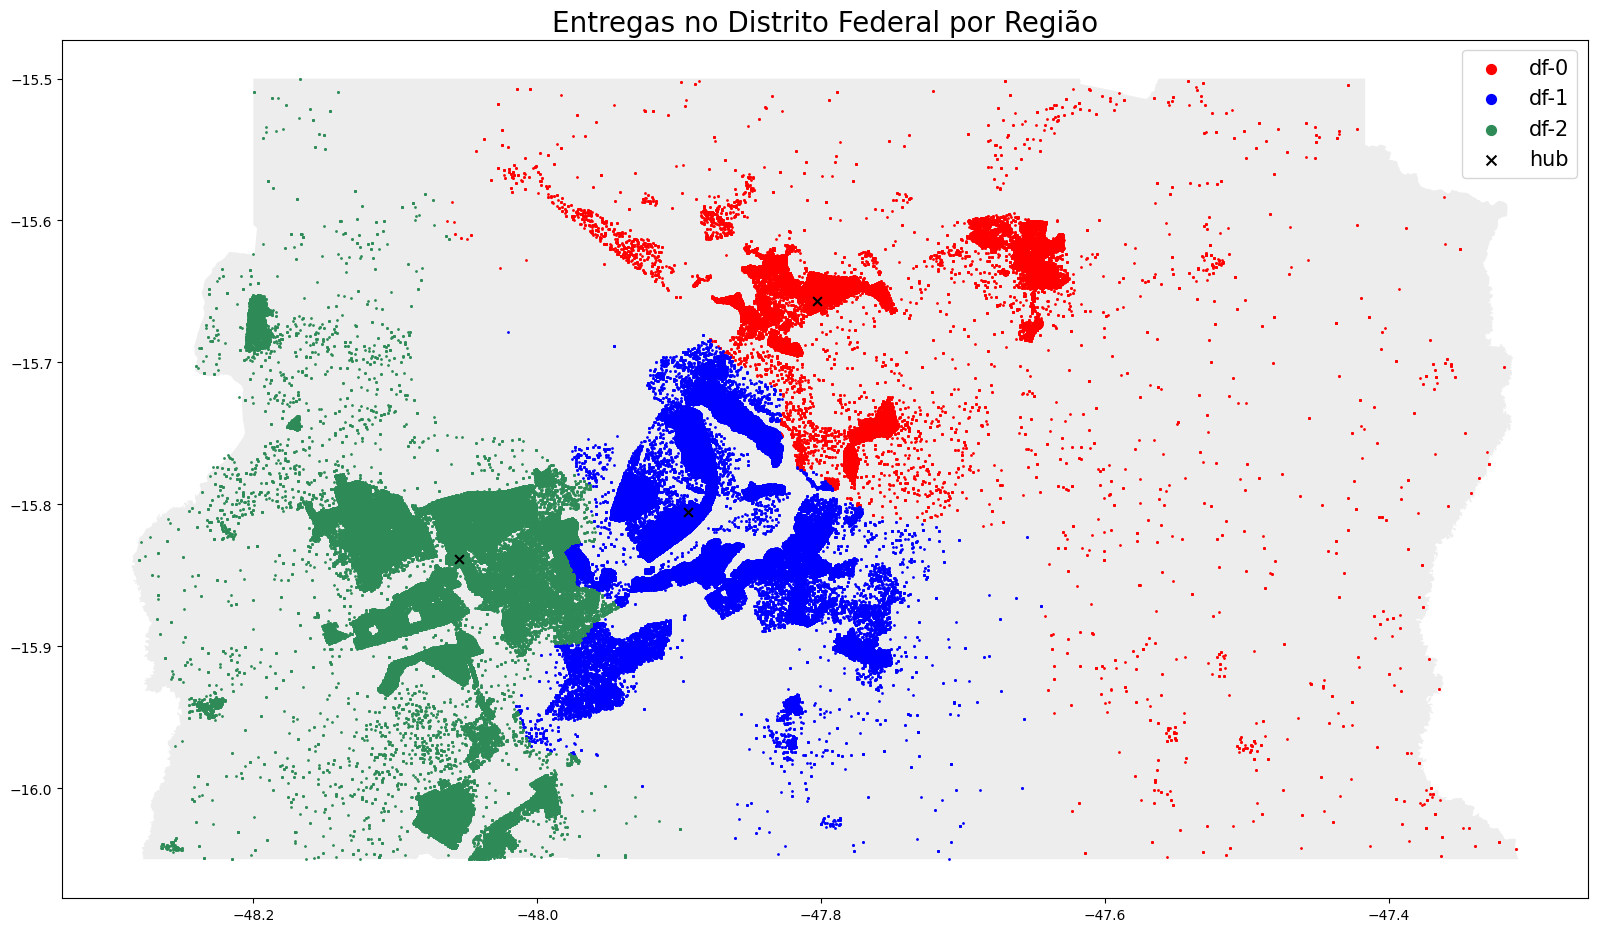

In [47]:
# Criando o plot vazio:

fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

# Plot Mapa do Distrito Federal:

mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

# Plot das Entregas:

geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="red", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="blue", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="seagreen", label="df-2")

# Plot dos Hubs:

geo_hub_df.plot(ax=ax, markersize=40, marker="x", color="black", label="hub")

# Plot da Legenda:

plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 20})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

# Insights e Informações

- No gráfico acima, podemos observar as entregas das 3 regiões. Onde o 'X' representa aonde estão localizado esses Hubs.
Em cinza é o mapa do Distrito Federal, em vermelho as entregas da região 0, em azul as entregas da região 1, e em verde as entregas da região 0.

- A região central de Brasília é altamente densa e concentrada. DF-1 atende algumas regiões como: Lago Norte, do Lago Sul e Jardim Botânico.

- Mais para o norte, podemos observar o DF-0, que está localizada em Taguatinga, ela atende regiões como a Ceilândia e toda a zona rural de Brasília basicamente. Regiões também concentradsa e altamente espalhadas, a maior dificuldade nessa região possa ser na hora da entrega, ou seja, isso pode impactar no preço e no tempo da entrega.

- E no sul, temos o DF-2, que atendem regiões como Recanto das Emas, Valparaíso de Goiás está muito concentada em uma região pequenas, mas está bem espalhada, não tanto comparado ao DF-0.

- Os Hubs estão muito bem localizados, está bem otimizado. Exceto por algumas regiões que se confundem do DF-1 com o DF-2.

Criando um DataFrame para gerar o gráfico de porcentagem de entregas por região, comparado a capacidade de veículos:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


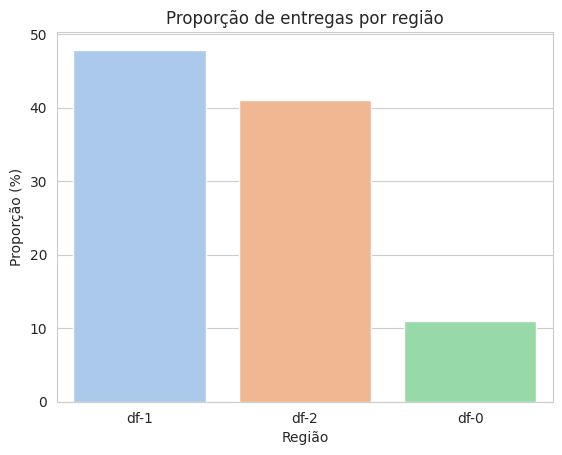

In [48]:
# Calculando a proporção de entregas por região:
data = deliveries_df['region'].value_counts(normalize=True).reset_index()
data.columns = ['region', 'region_percent']

# Converte para porcentagem:
data['region_percent'] *= 100

# Produção do gráfico:

with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=data, x="region", y="region_percent", palette="pastel")
    grafico.set(title='Proporção de entregas por região', xlabel='Região', ylabel='Proporção (%)')

plt.show()

- Quase 90% das entregas são das regiões do DF-1 e DF-2.
- Contudo, a capacidade dos veículos é a mesma para todos os Hubs, logo os veículos poderiam ser deslocados para as regiões de maior tráfego.